In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Generating Data

In [2]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=2,random_state=10)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


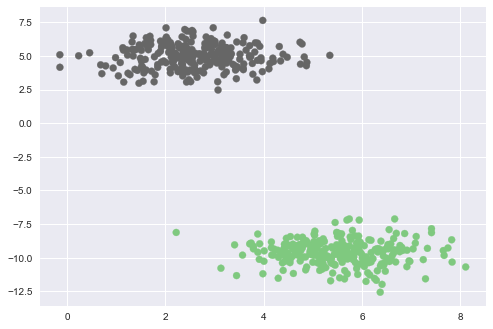

In [4]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.show()

### Model and helper functions

In [5]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [6]:
z = np.array([1,2,3,4,5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

### Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss
- Make the predictions

In [7]:
def predict(X,weights):
    """
    X --> mx(n+1) matrix
    w --> (n+1)X1 vector
    """
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

In [14]:
def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost
    
def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_-Y)
    
    weights = weights - learning_rate*dw/float(X.shape[0])
    return weights

def train(X,Y,learning_rate=0.5,max_epochs = 100):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    weights = np.zeros(X.shape[1])
    
    for epoch in range(max_epochs):
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d loss %.6f"%(epoch,l))
            
    return weights

In [15]:
weights = train(X,Y,learning_rate=0.7,max_epochs=1000)

Epoch 0 loss 0.000069
Epoch 10 loss 0.000069
Epoch 20 loss 0.000068
Epoch 30 loss 0.000067
Epoch 40 loss 0.000067
Epoch 50 loss 0.000066
Epoch 60 loss 0.000066
Epoch 70 loss 0.000065
Epoch 80 loss 0.000064
Epoch 90 loss 0.000064
Epoch 100 loss 0.000063
Epoch 110 loss 0.000063
Epoch 120 loss 0.000062
Epoch 130 loss 0.000062
Epoch 140 loss 0.000061
Epoch 150 loss 0.000061
Epoch 160 loss 0.000060
Epoch 170 loss 0.000060
Epoch 180 loss 0.000059
Epoch 190 loss 0.000059
Epoch 200 loss 0.000058
Epoch 210 loss 0.000058
Epoch 220 loss 0.000057
Epoch 230 loss 0.000057
Epoch 240 loss 0.000056
Epoch 250 loss 0.000056
Epoch 260 loss 0.000056
Epoch 270 loss 0.000055
Epoch 280 loss 0.000055
Epoch 290 loss 0.000054
Epoch 300 loss 0.000054
Epoch 310 loss 0.000054
Epoch 320 loss 0.000053
Epoch 330 loss 0.000053
Epoch 340 loss 0.000052
Epoch 350 loss 0.000052
Epoch 360 loss 0.000052
Epoch 370 loss 0.000051
Epoch 380 loss 0.000051
Epoch 390 loss 0.000051
Epoch 400 loss 0.000050
Epoch 410 loss 0.000050
Epo

In [16]:
print(weights)

[ 0.03413991 -0.41977712  2.65901083]


### Perceptron Implementation - Part II
- Make predictions
- Visualise the decision surface
- Linear vs Non-linear classification

In [17]:
def getPredictions(X_test,weights,labels = True):
    if X_test.shape[1]!= weights.shape[0]:
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones,X_test))
        
    probs = predict(X_test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [18]:
weights

array([ 0.03413991, -0.41977712,  2.65901083])

In [21]:
x1 = np.linspace(-2,8,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

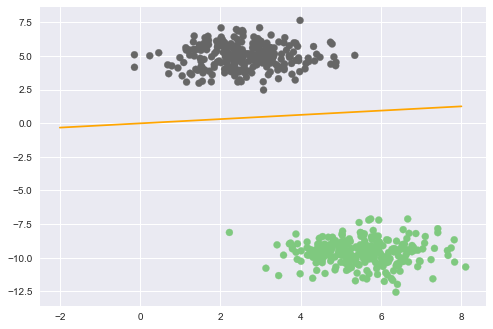

In [22]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.plot(x1,x2,color = 'orange')
plt.show()

In [23]:
Y_ = getPredictions(X,weights)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

1.0


In [24]:
from sklearn.datasets import make_moons

In [25]:
X,Y = make_moons(n_samples=1000,shuffle=True, noise=0.2, random_state=1)

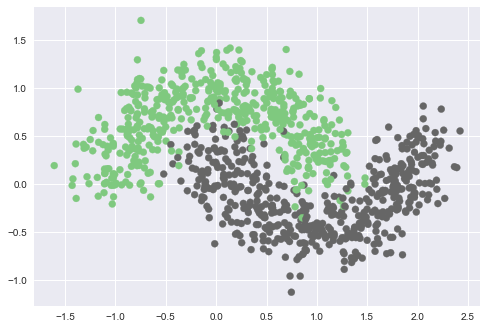

In [26]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.show()

In [27]:
weights = train(X,Y,learning_rate=0.7,max_epochs=1000)

Epoch 0 loss 0.631422
Epoch 10 loss 0.425205
Epoch 20 loss 0.375866
Epoch 30 loss 0.352787
Epoch 40 loss 0.338805
Epoch 50 loss 0.329238
Epoch 60 loss 0.322258
Epoch 70 loss 0.316971
Epoch 80 loss 0.312867
Epoch 90 loss 0.309623
Epoch 100 loss 0.307025
Epoch 110 loss 0.304920
Epoch 120 loss 0.303198
Epoch 130 loss 0.301778
Epoch 140 loss 0.300597
Epoch 150 loss 0.299610
Epoch 160 loss 0.298780
Epoch 170 loss 0.298078
Epoch 180 loss 0.297482
Epoch 190 loss 0.296973
Epoch 200 loss 0.296537
Epoch 210 loss 0.296163
Epoch 220 loss 0.295841
Epoch 230 loss 0.295562
Epoch 240 loss 0.295321
Epoch 250 loss 0.295111
Epoch 260 loss 0.294929
Epoch 270 loss 0.294769
Epoch 280 loss 0.294630
Epoch 290 loss 0.294509
Epoch 300 loss 0.294402
Epoch 310 loss 0.294308
Epoch 320 loss 0.294226
Epoch 330 loss 0.294153
Epoch 340 loss 0.294090
Epoch 350 loss 0.294033
Epoch 360 loss 0.293984
Epoch 370 loss 0.293940
Epoch 380 loss 0.293901
Epoch 390 loss 0.293866
Epoch 400 loss 0.293836
Epoch 410 loss 0.293809
Epo

In [30]:
x1 = np.linspace(-2,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

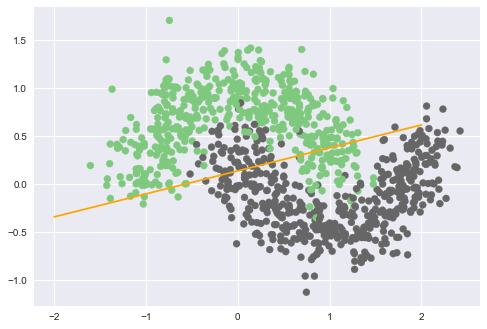

In [31]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.plot(x1,x2,color = 'orange')
plt.show()

In [32]:
Y_ = getPredictions(X,weights)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

0.869
